In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

In [172]:
df = pd.read_csv('pokemon.csv')
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0


In [173]:
df.describe()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,445.219216,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776,0.110075
std,267.772806,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472,0.313129
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.000000
25%,209.750000,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000,0.000000
50%,442.500000,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000,0.000000
75%,681.250000,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000,0.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000,1.000000


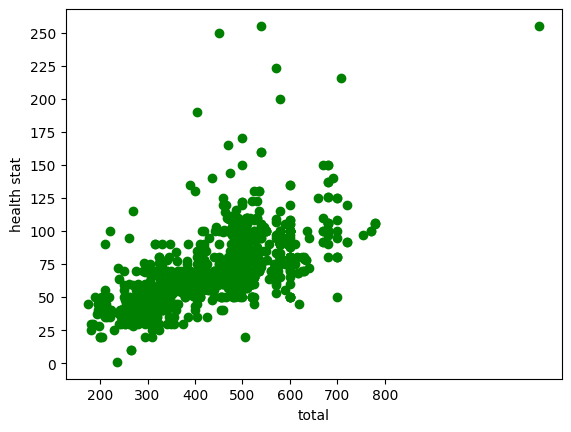

In [196]:
plt.scatter(df.total, df.hp,color = 'green')
plt.yticks(np.arange(0, 255, 25))
plt.xticks(np.arange(200, 801, 100))
plt.xlabel("total")
plt.ylabel("health stat")
plt.show()

In [174]:
X = np.asarray(df[['total','hp','attack','defense','sp_attack','sp_defense','speed']])
X[0:5]


array([[318,  45,  49,  49,  65,  65,  45],
       [405,  60,  62,  63,  80,  80,  60],
       [525,  80,  82,  83, 100, 100,  80],
       [625,  80, 100, 123, 122, 120,  80],
       [525,  80,  82,  83, 100, 100,  80]])

In [175]:
y = np.asarray(df[['legendary']])
y[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [176]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.01, -0.95, -0.98, -0.83, -0.25, -0.27, -0.79],
       [-0.3 , -0.39, -0.58, -0.38,  0.21,  0.27, -0.29],
       [ 0.69,  0.35,  0.03,  0.26,  0.82,  0.99,  0.37],
       [ 1.52,  0.35,  0.59,  1.54,  1.49,  1.7 ,  0.37],
       [ 0.69,  0.35,  0.03,  0.26,  0.82,  0.99,  0.37]])

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = None)
print("training set sizes : ",X_train.shape, y_train.shape)
print("testing set sizes : ",X_test.shape, y_test.shape)

training set sizes :  (857, 7) (857, 1)
testing set sizes :  (215, 7) (215, 1)


In [178]:
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train,y_train)
LR

C:\Users\91626\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [179]:
yhat = LR.predict(X_test)
yhat[0:6]

array([0, 0, 0, 0, 1, 0])

In [180]:
yhat_proba = LR.predict_proba(X_test)
yhat_proba[0:5]

array([[0.93, 0.07],
       [0.64, 0.36],
       [0.7 , 0.3 ],
       [0.9 , 0.1 ],
       [0.42, 0.58]])

In [181]:
jaccard_score(y_test, yhat, pos_label=0)

np.float64(0.9303482587064676)

[[ 14  11]
 [  3 187]]
Confusion matrix, without normalization
[[ 14  11]
 [  3 187]]


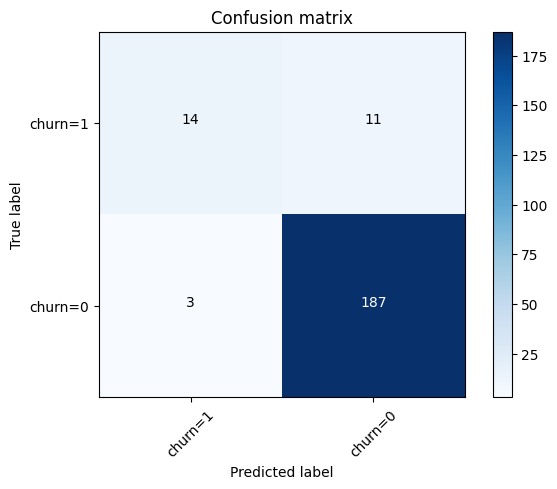

In [182]:
## confusion matrix ##
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [183]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       190
           1       0.82      0.56      0.67        25

    accuracy                           0.93       215
   macro avg       0.88      0.77      0.82       215
weighted avg       0.93      0.93      0.93       215



In [184]:
log_loss(y_test, yhat_proba)

0.30566141196585184